## Load Data & Check for Missing Values

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Check for missing values
print(f"Missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Missing values in y_train: {y_train.isnull().sum().sum()}")
print(f"Missing values in X_test: {X_test.isnull().sum().sum()}")
print(f"Missing values in y_test: {y_test.isnull().sum().sum()}")

# Display shape
print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Testing Features: {X_test.shape}, Testing Labels: {y_test.shape}")


Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_test: 0
Missing values in y_test: 0
Training Features: (164, 131), Training Labels: (164, 1)
Testing Features: (41, 131), Testing Labels: (41, 1)


## Train the Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train.values.ravel())

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0000
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
    

## Perform Leave-One-Out Cross-Validation (LOOCV)

In [7]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()
cv_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=loo, scoring="accuracy")

print("Mean LOOCV Accuracy:", cv_scores.mean())


Mean LOOCV Accuracy: 0.9817073170731707


## feature Importance Visualization

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_41124\2366233738.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette="coolwarm")


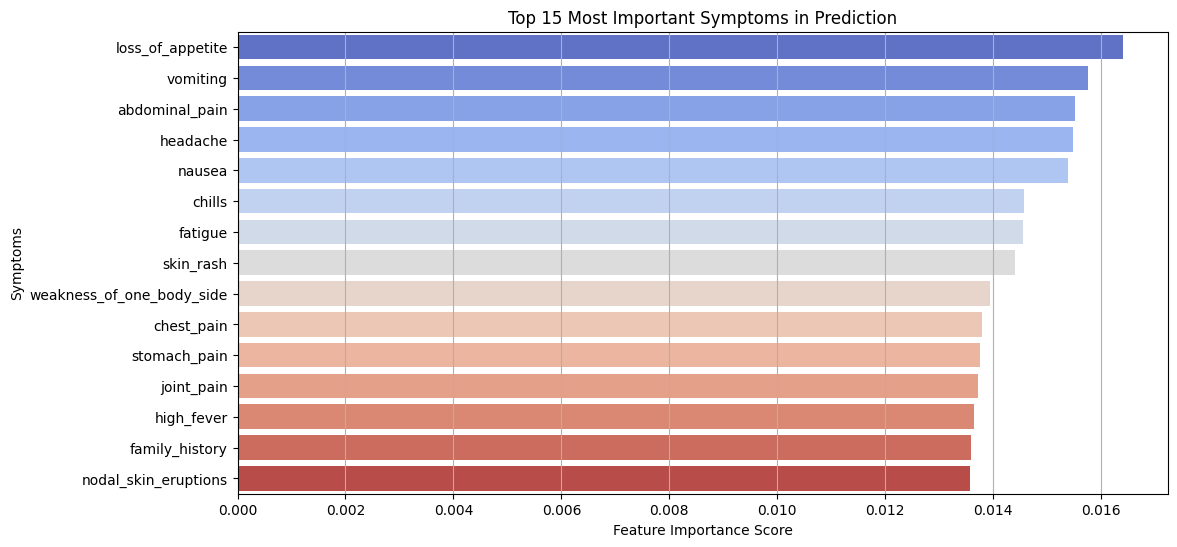

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Symptoms")
plt.title("Top 15 Most Important Symptoms in Prediction")
plt.grid(axis='x')
plt.show()


##  Save the Mode

In [9]:
import os
import joblib

# Ensure models directory exists
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "disease_prediction_model.pkl")
joblib.dump(model, model_path)
print(f"\n💾 Model saved as: {model_path}")



💾 Model saved as: ../models\disease_prediction_model.pkl


## Disease Prediction Example

In [10]:
import pandas as pd

# Load model
model = joblib.load("../models/disease_prediction_model.pkl")

# Load symptom encoding
df = pd.read_csv("../data/processed/disease_symptom_encoded_augmented.csv")
symptom_columns = df.columns[1:]  # Exclude "Disease"

# Define input symptoms
input_symptoms = ["chest_pain", "high_fever", "cough"]

# Check for missing symptoms
missing_symptoms = [symptom for symptom in input_symptoms if symptom not in symptom_columns]
if missing_symptoms:
    print(f"⚠ Warning: These symptoms are not in the dataset: {missing_symptoms}")

# Encode symptoms as input vector
input_vector = pd.DataFrame([[0] * len(symptom_columns)], columns=symptom_columns)
for symptom in input_symptoms:
    if symptom in input_vector.columns:
        input_vector[symptom] = 1

# Predict disease
predicted_disease = model.predict(input_vector)[0]
print(f"🩺 Predicted Disease: {predicted_disease}")


🩺 Predicted Disease: Allergy


In [11]:
df = pd.read_csv("../data/processed/disease_symptom_encoded_augmented.csv")
print(f"Dataset shape after augmentation: {df.shape}")

# Check for duplicate rows
print(f"Duplicate rows found: {df.duplicated().sum()}")


Dataset shape after augmentation: (205, 132)
Duplicate rows found: 0
